In [1]:
from keras.models import load_model
import numpy as np
from data_loader import loader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# use seaborn plotting defaults
import seaborn as sns; sns.set()

Using TensorFlow backend.


In [2]:
load_data = loader()
train_x, _, _ = load_data.load()

In [3]:
# Encoder Load

encoder = load_model(r'./weights/encoder_weights.h5')

/home/reki/.local/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
train_x.shape

(60, 17)

In [5]:
data = pd.read_csv('./Rekita.csv', header=None)
# y = data.iloc[:, 0].astype('category').cat.codes
y = data.iloc[:, 0]

In [6]:
y

0     Rekita
1     Rekita
2     Rekita
3     Rekita
4     Rekita
5       Deep
6       Deep
7       Deep
8       Deep
9       Deep
10      Bhrt
11      Bhrt
12      Bhrt
13      Bhrt
14      Bhrt
15      Deep
16      Deep
17      Deep
18      Deep
19      Deep
20    Rekita
21    Rekita
22    Rekita
23    Rekita
24    Rekita
25    Rekita
26    Rekita
27    Rekita
28    Rekita
29    Rekita
30      hoka
31      hoka
32      hoka
33      hoka
34      hoka
35      hoka
36      hoka
37      hoka
38      hoka
39      hoka
40    Rekita
41    Rekita
42    Rekita
43    Rekita
44    Rekita
45      Deep
46      Deep
47      Deep
48      Deep
49      Deep
50    Patwal
51    Patwal
52    Patwal
53    Patwal
54    Patwal
55    Patwal
56    Patwal
57    Patwal
58    Patwal
59    Patwal
Name: 0, dtype: object

In [90]:
for i in range(len(y)):
    if y[i] != 'Rekita':
        y[i] = 'A'
y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     Rekita
1     Rekita
2     Rekita
3     Rekita
4     Rekita
5          A
6          A
7          A
8          A
9          A
10         A
11         A
12         A
13         A
14         A
15         A
16         A
17         A
18         A
19         A
20    Rekita
21    Rekita
22    Rekita
23    Rekita
24    Rekita
25    Rekita
26    Rekita
27    Rekita
28    Rekita
29    Rekita
30         A
31         A
32         A
33         A
34         A
35         A
36         A
37         A
38         A
39         A
40    Rekita
41    Rekita
42    Rekita
43    Rekita
44    Rekita
45         A
46         A
47         A
48         A
49         A
50         A
51         A
52         A
53         A
54         A
55         A
56         A
57         A
58         A
59         A
Name: 0, dtype: object

In [91]:
y = y.astype('category').cat.codes
train_y = y.to_numpy()
train_y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [92]:
train_x.shape

(60, 17)

In [93]:
X = np.zeros((60, 8))
X

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 

In [94]:


for i in range(len(train_x)):
    inp=train_x[i].reshape(17,)
    inp=np.expand_dims(inp,axis=0) #reshaping into 17,1 for encoder
    X[i] = encoder.predict(inp)[0] #compressed data
    
    
train_x = X
train_x

array([[1.78536713e+00, 0.00000000e+00, 1.88018596e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.87938654e+00, 1.09208681e-01, 1.67799401e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35441279e+00, 1.56122223e-02, 1.49333704e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.69865429e+00, 1.97207719e-01, 1.39205885e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41038573e+00, 3.32299322e-01, 1.10639656e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.79477119e+00, 1.28716969e+00, 6.29812777e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.11065686e+00, 2.25145876e-01, 1.07017314e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.

In [95]:
train_x.shape

(60, 8)

In [98]:
x_train = train_x[:50]
y_train = train_y[:50]
x_test = train_x[50:]
y_test = train_y[50:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50, 8), (50,), (10, 8), (10,))

In [99]:
# SVC 

model = SVC()
model.fit(x_train, y_train)

print("Train ACC : {}\nTest ACC : {}".format(model.score(x_train, y_train), model.score(x_test, y_test)))

Train ACC : 0.84
Test ACC : 0.5


In [100]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

train_x_pca = pca.fit_transform(x_train)
train_x_pca.shape
test_x_pca = pca.fit_transform(x_test)
train_x_pca.shape, test_x_pca.shape

((50, 2), (10, 2))

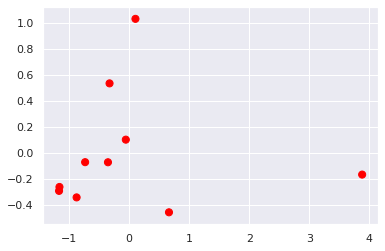

In [101]:
plt.scatter(test_x_pca[:, 0], test_x_pca[:, 1], c=y_test, s=50, cmap='autumn')

In [102]:
#SVC after PCA

model = SVC()
model.fit(train_x_pca, y_train)

print("Train ACC : {}\nTest ACC : {}".format(model.score(train_x_pca, y_train), model.score(test_x_pca, y_test)))

Train ACC : 0.88
Test ACC : 0.7
